In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import folium
import matplotlib.patches as mpatches 

In [70]:
#Importation des notre Dataframe
df= pd.read_csv('p2-arbres-fr.csv', delimiter=';')

In [71]:
#Affichage de notre Dataframe
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


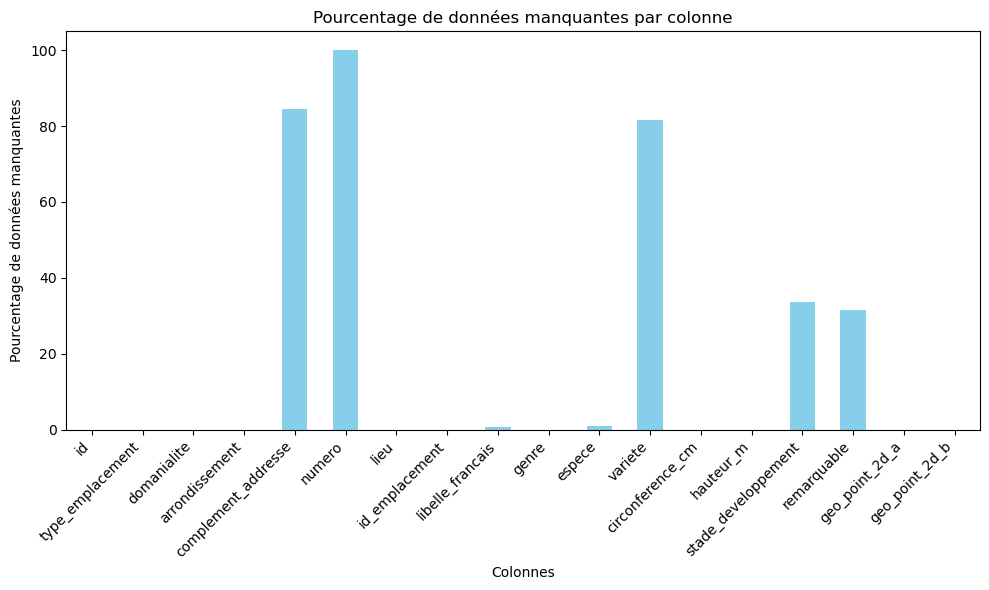

In [72]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df.isnull().sum() / len(df)) * 100

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
pourcentage_manquant_par_colonne.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

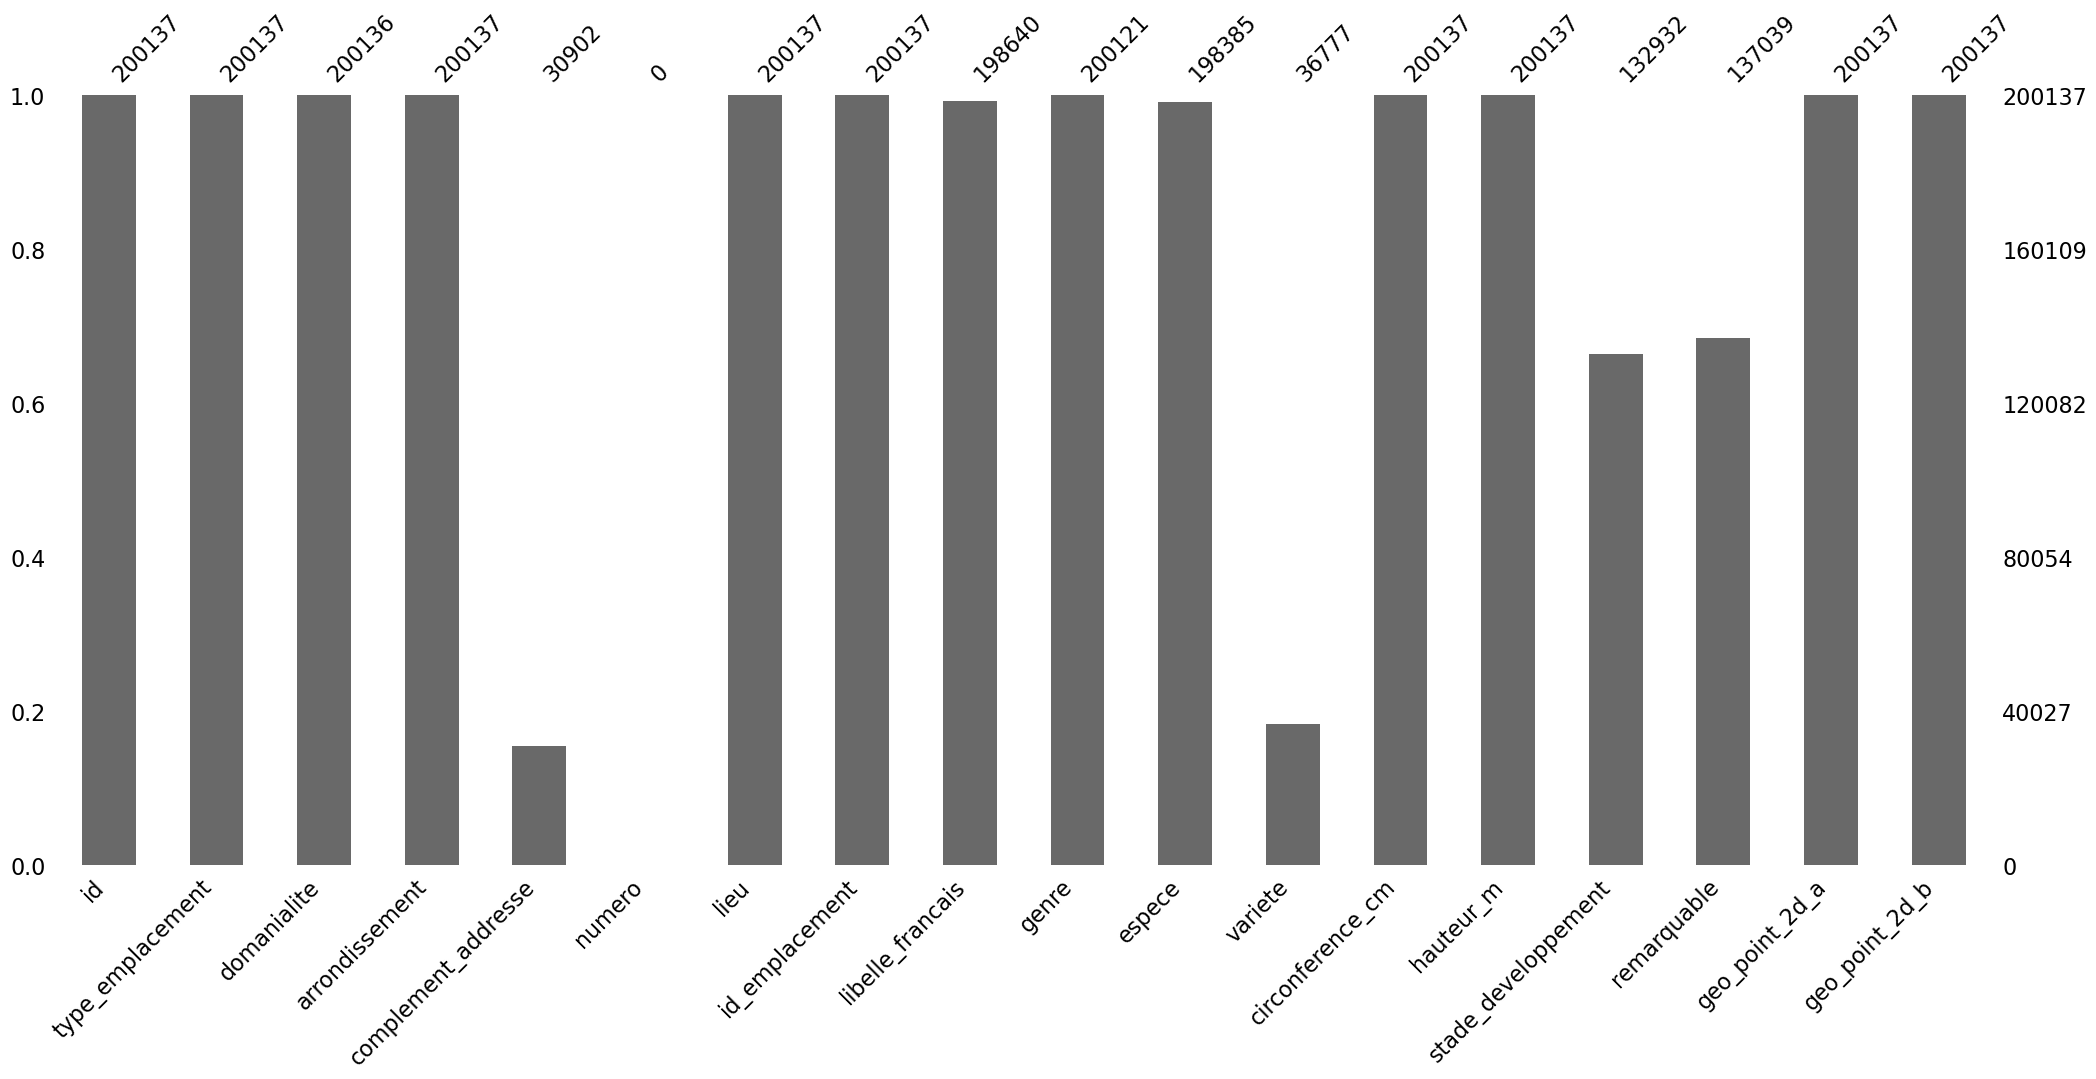

In [73]:
msno.bar(df)

In [74]:
#Affichage de Dataframe sans les colonnes complement_adresse, numero et type_emplacement
df_cleaned = df.drop(['complement_addresse', 'numero','type_emplacement'], axis=1)
df_cleaned.head()

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [75]:
#Identification des colonnes avec des valeurs manquantes
valeurs_manquantes_par_colonne = df_cleaned.isnull().sum()
print("Colonnes avec des valeurs manquantes :")
print(valeurs_manquantes_par_colonne)

Colonnes avec des valeurs manquantes :
id                          0
domanialite                 1
arrondissement              0
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


In [76]:
# Suppression des valeurs nulles des colonnes spécifiques
colonnes_a_nettoyer = ['variete', 'stade_developpement', 'remarquable','libelle_francais', 'espece']
df_cleaned = df_cleaned.dropna(subset=colonnes_a_nettoyer)

# Afficher les premières lignes du DataFrame nettoyé
print("\nDataFrame après suppression des valeurs manquantes :")
df_cleaned.head()


DataFrame après suppression des valeurs manquantes :


,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
153,100192,Jardin,PARIS 13E ARRDT,SQUARE CLARA ZETKIN / 21 AVENUE BOUTROUX,201010,Prunier à fleurs,Prunus,cerasifera,Pissardii',70,5,A,0.0,48.821736,2.376434
1776,101919,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,E0230029,Prunier à fleurs,Prunus,cerasifera,Pissardii',80,10,A,0.0,48.880488,2.386052
1779,101924,Jardin,PARIS 19E ARRDT,PARC DES BUTTES CHAUMONT,E0230031,Prunier à fleurs,Prunus,cerasifera,Pissardii',85,15,A,0.0,48.880510,2.386125
1929,102104,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000E0117,Châtaignier,Castanea,sativa,Albomarginata',65,6,JA,0.0,48.822424,2.337417
1930,102105,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000E0113,Cerisier à fleurs,Prunus,serrulata,Kanzan',74,5,A,0.0,48.822477,2.337358


<Axes: >

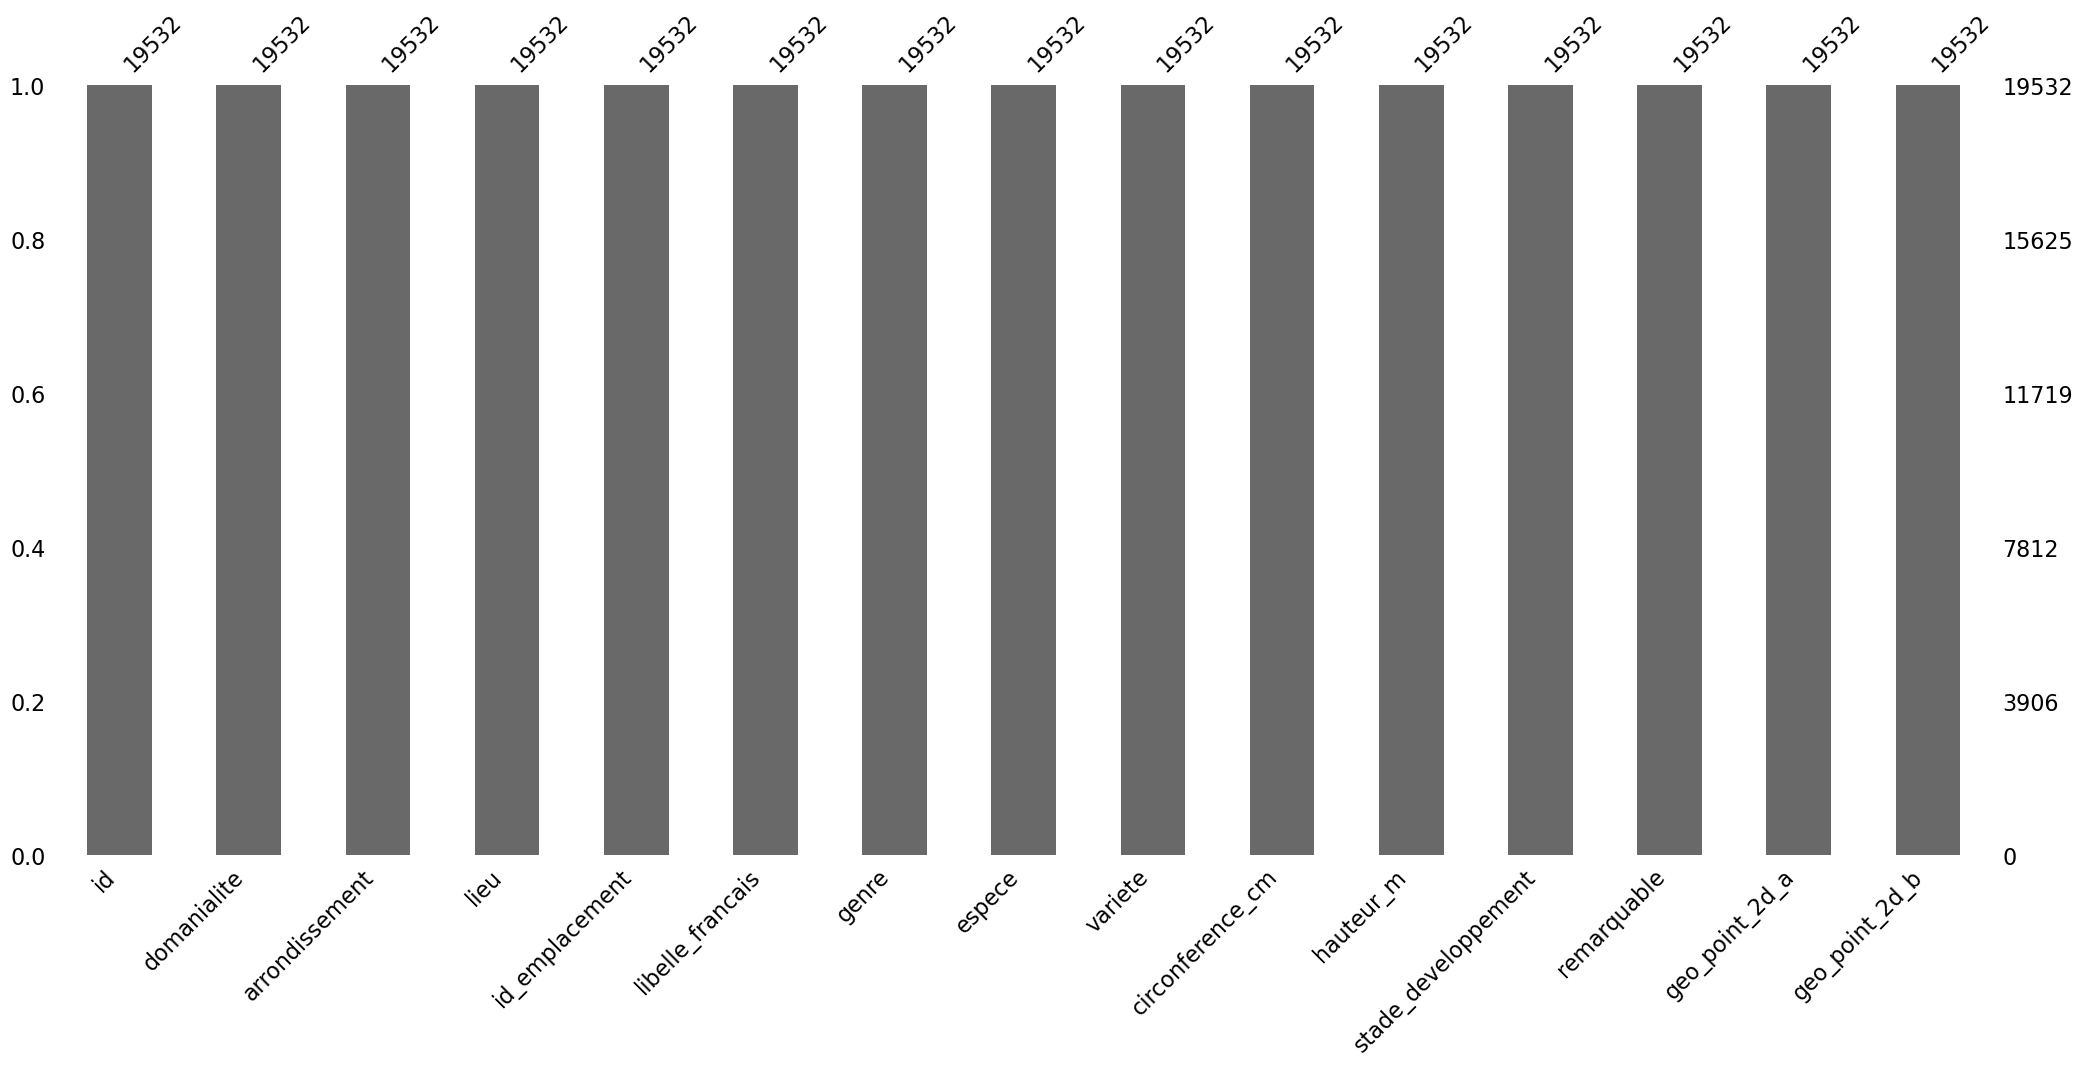

In [77]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

msno.bar(df_cleaned)

In [78]:
#Calcul des statistiques descriptives pour les variables numériques
statistiques_descriptives = df[['circonference_cm', 'hauteur_m']].describe()

# Afficher les statistiques descriptives
statistiques_descriptives

,circonference_cm,hauteur_m
count,200137.000000,200137.000000
mean,83.380479,13.110509
std,673.190213,1971.217387
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,250255.000000,881818.000000


In [79]:
# Calculer les statistiques afficher la moyenne, min, max et médiane pour 'circonference_cm' et 'hauteur_m' 
stats = {
    'Moyenne': df_cleaned[['circonference_cm', 'hauteur_m']].mean(),
    'Minimum': df_cleaned[['circonference_cm', 'hauteur_m']].min(),
    'Maximum': df_cleaned[['circonference_cm', 'hauteur_m']].max(),
    'Médiane': df_cleaned[['circonference_cm', 'hauteur_m']].median()
}

# Créer un DataFrame à partir des statistiques calculées
stats_df = pd.DataFrame(stats)
stats_df

,Moyenne,Minimum,Maximum,Médiane
circonference_cm,80.351475,0,79120,66.0
hauteur_m,8.772015,0,1010,8.0


In [80]:
# Calculer les statistiques pour chaque genre par rapport à la circonference et la hauteur
stats_by_genre = df_cleaned.groupby('genre')[['circonference_cm', 'hauteur_m']].agg(['mean', 'min', 'max', 'median'])
stats_by_genre

circonference_cm                    hauteur_m                
                       mean min    max median       mean min  max median
genre                                                                   
Acer              76.945930   0   1000   70.5   9.250000   0  100    9.0
Aesculus          99.044655   5  79120   80.0   9.252980   0  155    9.0
Ailanthus         90.000000  80    100   90.0  15.000000  15   15   15.0
Alangium          20.000000  20     20   20.0   3.000000   3    3    3.0
Albizia           25.818182  10     65   20.0   3.727273   2    8    3.0
...                     ...  ..    ...    ...        ...  ..  ...    ...
Tilia             74.620974   4    660   70.0   9.336793   1  610    9.0
Toona             62.800000  15    220   30.0   8.040000   3   20    5.0
Ulmus            105.833333  21    213  103.0   6.000000   2   10    5.5
Zelkova           45.600000  18     61   49.0   6.600000   4    9    6.0
x Chitalpa        20.000000  20     20   20.0   3.000000   3    3    3.0

[62 rows x 8 columns]

In [81]:
# Remplacer les valeurs dans la colonne 'stade_developpement'
df_cleaned['stade_developpement'] = df_cleaned['stade_developpement'].replace({'A': 'Adulte', 'J': 'Jeune', 'JA': 'Jeune Adulte', 'M': 'Mature'})

# Afficher les valeurs uniques après remplacement
print(df_cleaned['stade_developpement'].unique())

['Adulte' 'Jeune Adulte' 'Mature' 'Jeune']


In [82]:
# Calculer les statistiques pour chaque stade de développement
stats_by_stage = df_cleaned.groupby('stade_developpement')[['circonference_cm', 'hauteur_m']].agg(['mean', 'min', 'max', 'median'])

stats_by_stage

circonference_cm                    hauteur_m            \
                                mean min    max median       mean min   max   
stade_developpement                                                           
Adulte                    115.079148   0  79120  100.0  10.923982   0   155   
Jeune                      35.661293   0   2025   30.0   5.303568   0   112   
Jeune Adulte               65.135542   0    376   60.0   8.474306   0  1010   
Mature                    203.741497  20   1220  200.0  17.000000   2   112   

                            
                    median  
stade_developpement         
Adulte                10.0  
Jeune                  5.0  
Jeune Adulte           8.0  
Mature                18.0

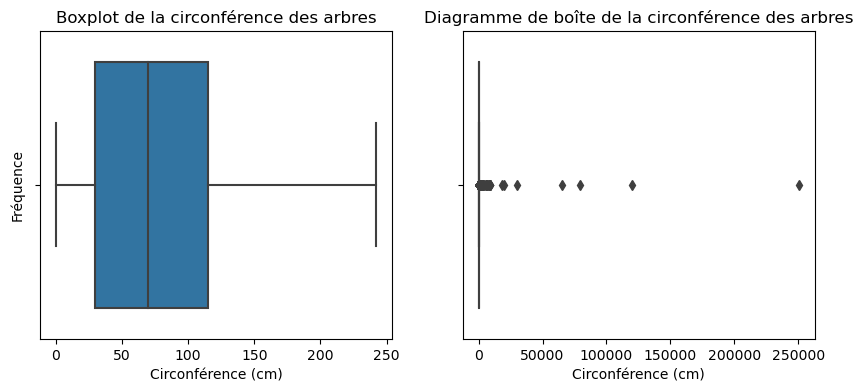

In [83]:
# Histogramme de la circonférence
fig,axes = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(data=df, x='circonference_cm',showfliers=False, ax=axes[0])
axes[0].set_title('Boxplot de la circonférence des arbres')
axes[0].set_xlabel('Circonférence (cm)')
axes[0].set_ylabel('Fréquence')

# Diagramme de boîte de la circonférence
sns.boxplot(data=df, x='circonference_cm',ax=axes[1])
axes[1].set_title('Diagramme de boîte de la circonférence des arbres')
axes[1].set_xlabel('Circonférence (cm)')

plt.show()

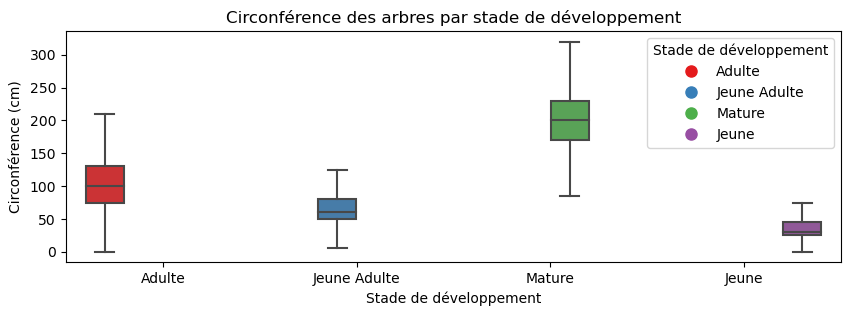

In [84]:
#Visualisation des données par stade de développement avec stripplot
colors = sns.color_palette('Set1')[:len(df_cleaned['stade_developpement'].unique())]
labels = df_cleaned['stade_developpement'].unique()

# Créer une légende personnalisée
legend_patches = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='') for color, label in zip(colors, labels)]

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_cleaned, x='stade_developpement', y='circonference_cm', hue='stade_developpement', showfliers=False, palette='Set1')
plt.title('Circonférence des arbres par stade de développement')
plt.xlabel('Stade de développement')
plt.ylabel('Circonférence (cm)')

plt.legend(handles=legend_patches, title='Stade de développement')
plt.show()

In [85]:
# Détection des données aberrantes pour la ciconférance des arbres 
circonference_aberrante = df_cleaned[df_cleaned['circonference_cm'] > 70000]

# Affichage des données aberrantes dans un tableau
print("Données aberrantes :")
circonference_aberrante

Données aberrantes :


,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
173343,298211,Alignement,PARIS 5E ARRDT,BOULEVARD DE PORT ROYAL,402001,Marronnier,Aesculus,x carnea,Briotii',79120,10,Adulte,0.0,48.837227,2.348598


In [86]:
# Suppression des données aberrantes concernant la circonférence des arbres
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['circonference_cm'] > 70000].index)

# Vérification que les données aberrantes ont été supprimées
print("Nombre de lignes après suppression des données aberrantes :", len(df_cleaned))

Nombre de lignes après suppression des données aberrantes : 19531


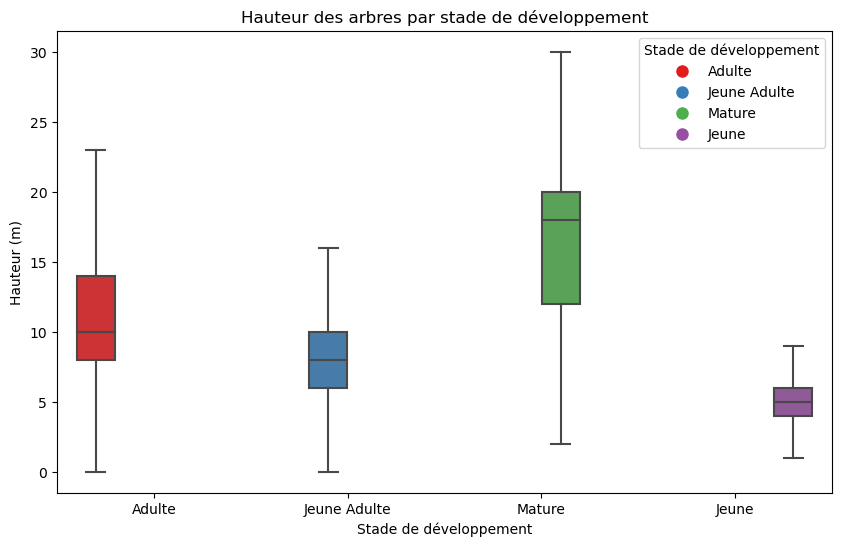

In [87]:
#Visualisation des données par stade de développement avec stripplot
colors = sns.color_palette('Set1')[:len(df_cleaned['stade_developpement'].unique())]
labels = df_cleaned['stade_developpement'].unique()

# Créer une légende personnalisée
legend_patches = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='') for color, label in zip(colors, labels)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='stade_developpement', y='hauteur_m', hue='stade_developpement', showfliers=False, palette='Set1')
plt.title('Hauteur des arbres par stade de développement')
plt.xlabel('Stade de développement')
plt.ylabel('Hauteur (m)')

plt.legend(handles=legend_patches, title='Stade de développement')
plt.show()

In [88]:
# Détection des données aberrantes pour la hauteur des arbres 
hauteur_aberrante = df_cleaned[df_cleaned['hauteur_m'] > 550]

# Affichage des données aberrantes dans un tableau
print("Données aberrantes :")
hauteur_aberrante

Données aberrantes :


,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
107327,228704,Alignement,PARIS 4E ARRDT,RUE NEUVE SAINT PIERRE,101009,Poirier à fleurs,Pyrus,calleryana,Chanticleer',45,1010,Jeune Adulte,0.0,48.853771,2.363363
120292,243307,Alignement,PARIS 19E ARRDT,QUAI DE LA LOIRE,105016,Tilleul,Tilia,x europaea,Euchlora',70,610,Jeune Adulte,0.0,48.885790,2.375269


In [89]:
# Suppression des données aberrantes concernant la hauteur des arbres
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['hauteur_m'] > 550].index)

# Vérification que les données aberrantes ont été supprimées
print("Nombre de lignes après suppression des données aberrantes :", len(df_cleaned))

Nombre de lignes après suppression des données aberrantes : 19529


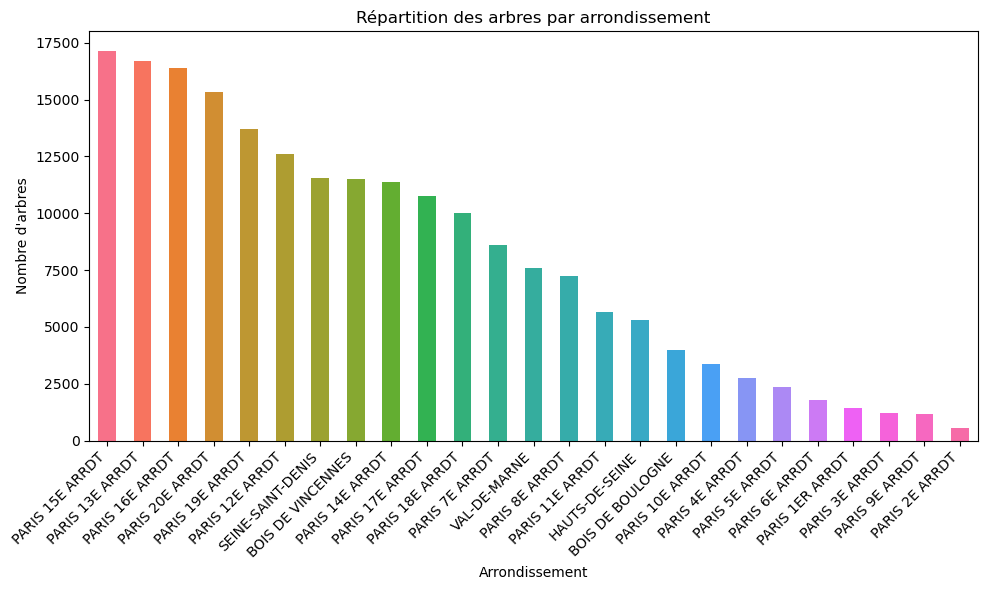

In [90]:
# Calculer le nombre d'arbres par arrondissement
arbres_par_arrondissement = df['arrondissement'].value_counts()

# Définir une palette de couleurs personnalisée pour chaque arrondissement
palette_couleurs = sns.color_palette('husl', n_colors=len(arbres_par_arrondissement))

# Créer le graphique à barres avec la palette de couleurs personnalisée
plt.figure(figsize=(10, 6))
arbres_par_arrondissement.plot(kind='bar', color=palette_couleurs)
plt.title('Répartition des arbres par arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [91]:
# Grouper les données par arrondissement et genre d'arbre, puis compter le nombre d'arbres de chaque genre dans chaque arrondissement
genre_par_arrondissement = df.groupby(['arrondissement', 'genre'])['id'].count().reset_index()

# Trouver le genre d'arbre prédominant dans chaque arrondissement
genre_preponderant_par_arrondissement = genre_par_arrondissement.loc[genre_par_arrondissement.groupby('arrondissement')['id'].idxmax()]

# Afficher le résultat
genre_preponderant_par_arrondissement

,arrondissement,genre,id
1,BOIS DE BOULOGNE,Aesculus,1318
134,BOIS DE VINCENNES,Tilia,2024
146,HAUTS-DE-SEINE,Acer,1372
218,PARIS 10E ARRDT,Platanus,1110
287,PARIS 11E ARRDT,Platanus,1682
367,PARIS 12E ARRDT,Platanus,3787
462,PARIS 13E ARRDT,Platanus,2468
561,PARIS 14E ARRDT,Platanus,2614
677,PARIS 15E ARRDT,Tilia,2202
776,PARIS 16E ARRDT,Platanus,4007


In [92]:
#Regroupement de genre d'arbre par arrondissement et calculer les valeurs min, max, count et median / genre
genre_par_arrondissement = df.groupby(['arrondissement', 'genre'])['id'].agg(['min', 'max', 'count', 'median'])
genre_par_arrondissement 

min      max  count     median
arrondissement   genre                                                
BOIS DE BOULOGNE Acer                202646  2018007    444   214656.5
                 Aesculus            204587  2018008   1318  2000275.0
                 Carpinus            203127  2001579     25   214698.0
                 Catalpa             211203   211206      3   211205.0
                 Celtis              212544  2011922     53   214691.0
...                                     ...      ...    ...        ...
VAL-DE-MARNE     Toona               152459   152582    117   152520.0
                 Ulmus               159800  2017101     41   171343.0
                 Viburnum           2017083  2017106      2  2017094.5
                 Zelkova             140061   171360     10   155420.5
                 x Cupressocyparis   155372   155374      3   155373.0

[1879 rows x 4 columns]

In [93]:
# Obtenir l'index de la ligne avec le nombre le plus élevé d'arbres pour chaque arrondissement
indices_max = genre_par_arrondissement.groupby('arrondissement')['count'].idxmax()

# Sélectionner les lignes correspondantes dans le DataFrame genre_par_arrondissement
genre_le_plus_plante_par_arrondissement = genre_par_arrondissement.loc[indices_max]
genre_le_plus_plante_par_arrondissement

,,min,max,count,median
arrondissement,genre,,,,
BOIS DE BOULOGNE,Aesculus,204587,2018008,1318,2000275.0
BOIS DE VINCENNES,Tilia,201754,2024735,2024,2004943.5
HAUTS-DE-SEINE,Acer,140366,2021607,1372,143930.5
PARIS 10E ARRDT,Platanus,184209,2022061,1110,285412.5
PARIS 11E ARRDT,Platanus,115837,2022088,1682,238108.0
PARIS 12E ARRDT,Platanus,100322,2021251,3787,288290.0
PARIS 13E ARRDT,Platanus,109110,2023013,2468,225018.5
PARIS 14E ARRDT,Platanus,106995,2016876,2614,241176.5
PARIS 15E ARRDT,Tilia,102191,2021950,2202,249884.0


In [111]:
# Calculer le nombre total d'arbres par domanialité en agrégeant par domanialité et genre d'arbre
arbres_par_domanialite = df.groupby(['domanialite', 'genre'])['id'].count()

# Trier la colonne genre en ordre décroissant par domanialité
arbres_par_domanialite_trie = arbres_par_domanialite.groupby('domanialite', group_keys=False).nlargest()
arbres_par_domanialite_trie

domanialite   genre    
Alignement    Platanus     35831
              Aesculus     16434
              Tilia        11910
              Sophora       8913
              Acer          5495
CIMETIERE     Acer          6596
              Aesculus      4035
              Tilia         3086
              Platanus      3046
              Fraxinus      2176
DAC           Tilia            5
              Prunus           4
              Crataegus        3
              Platanus         3
              Acer             1
DASCO         Aesculus      1506
              Platanus       874
              Prunus         637
              Acer           599
              Malus          520
DASES         Platanus         4
DFPE          Prunus         263
              Acer           167
              Betula          93
              Tilia           88
              Platanus        85
DJS           Tilia          774
              Acer           512
              Pinus          298
              Prunu